In [26]:
import os
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data Input

In this section, we will input the data from 2 files: 'Labels and Concentration.txt' and 'Raman Spectra.csv'. Final data sized in 120 rows and 615 columns. 613 columns from the raman spectra, 1 column for the labels, and 1 column for concentration of each samples.

In [27]:
# Read the file into a list of lines
with open('Labels.txt', 'r') as file:
    lines = file.readlines()
    
# Process the data
data = []
for line in lines:
    # Split the line by whitespace
    parts = line.split()
    # Append a tuple of (first part, second part, third part) to the data list
    data.append((parts[0],float(parts[1])))

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['concentration', 'labels'])

# Display the DataFrame
print(df)

   concentration    labels
0         CPKO.A  1.920782
1         CPKO.A  1.920782
2         CPKO.A  1.355846
3        CPKO.MM  3.615590
4        CPKO.MM  3.841565
..           ...       ...
89       RBDPO.W  0.112987
90       RBDPO.W  0.056494
91       RBDPO.W  0.169481
92       RBDPO.W  0.169481
93       RBDPO.W  0.084740

[94 rows x 2 columns]


In [28]:
raman_full = pd.read_csv('RamanAll.csv')

print(raman_full) #Showing first 5 data

      1799.19    1797.46    1795.74    1794.02    1792.29    1790.57  \
0   10.487390  13.532983  14.166622  12.995213  10.625642   7.664775   
1   25.982815  22.134153  18.919311  16.178868  13.753398  11.483474   
2    0.826021   1.322347   1.293807   0.934279   0.437640  -0.002235   
3    4.499307   4.546286   4.025945   3.128717   2.045031   0.965313   
4    2.952443   4.475205   4.979949   4.710693   3.911448   2.826217   
..        ...        ...        ...        ...        ...        ...   
89   8.194417   6.166511   4.636843   3.500674   2.653266   1.989884   
90  11.446929  11.509245  11.224262  10.595090   9.624833   8.316587   
91  13.099646  10.838894   8.703917   6.745083   5.012754   3.557293   
92   5.868276   3.568879   2.492488   2.328167   2.764988   3.492029   
93   3.749265   5.696911   6.581126   6.604687   5.970364   4.880914   

     1788.84   1787.11   1785.39   1783.66  ...    419.392    417.326  \
0   6.658585  4.862557  1.096294  0.540938  ...  25.050187  30

In [29]:
all_data = pd.concat([raman_full, df], axis=1, ignore_index=True)
all_data.rename(columns={740: 'labels', 741: 'concentration'}, inplace=True)
labels = all_data['labels'].values

print(all_data)

            0          1          2          3          4          5  \
0   10.487390  13.532983  14.166622  12.995213  10.625642   7.664775   
1   25.982815  22.134153  18.919311  16.178868  13.753398  11.483474   
2    0.826021   1.322347   1.293807   0.934279   0.437640  -0.002235   
3    4.499307   4.546286   4.025945   3.128717   2.045031   0.965313   
4    2.952443   4.475205   4.979949   4.710693   3.911448   2.826217   
..        ...        ...        ...        ...        ...        ...   
89   8.194417   6.166511   4.636843   3.500674   2.653266   1.989884   
90  11.446929  11.509245  11.224262  10.595090   9.624833   8.316587   
91  13.099646  10.838894   8.703917   6.745083   5.012754   3.557293   
92   5.868276   3.568879   2.492488   2.328167   2.764988   3.492029   
93   3.749265   5.696911   6.581126   6.604687   5.970364   4.880914   

           6         7         8         9  ...        732        733  \
0   6.658585  4.862557  1.096294  0.540938  ...  31.876748  31

In [30]:
X = all_data.drop(columns=['concentration', 'labels']).values
y = all_data['concentration'].values

In [31]:
print(X)

[[ 1.0487390e+01  1.3532983e+01  1.4166622e+01 ...  2.8442813e+01
   3.2844875e+01  4.1873334e+01]
 [ 2.5982815e+01  2.2134153e+01  1.8919311e+01 ...  2.0394852e+01
   1.8256282e+01  1.7666499e+01]
 [ 8.2602100e-01  1.3223470e+00  1.2938070e+00 ...  4.5960070e+00
   5.0601120e+00  7.3463810e+00]
 ...
 [ 1.3099646e+01  1.0838894e+01  8.7039170e+00 ...  9.0627710e+00
   1.3232942e+01  2.1843718e+01]
 [ 5.8682760e+00  3.5688790e+00  2.4924880e+00 ...  2.3306888e+01
   2.2506485e+01  2.1189326e+01]
 [ 3.7492650e+00  5.6969110e+00  6.5811260e+00 ...  1.4731841e+01
   9.1118360e+00 -1.2410000e-03]]


In [32]:
np.array(y).shape, X.shape

((94,), (94, 740))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, labels_train, labels_test = train_test_split(X, y, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val, labels_train, labels_val = train_test_split(X_train, y_train, labels_train, test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 740), (19, 740), (60,), (19,))

In [35]:
#K Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
# Find best number of components using PRESS and cross-validation
# Parameters:
n_components = 10 # number of components to test
press_train = []
press_test = []
fold = KFold(n_splits=5, shuffle=True, random_state=42)

for i in range(1, n_components + 1):
    pls = PLSRegression(n_components = i)
    press_train.append(-np.mean(cross_val_score(pls, X_train, y_train, cv=fold, scoring='neg_mean_squared_error')))
    press_test.append(-np.mean(cross_val_score(pls, X_test, y_test, cv=fold, scoring='neg_mean_squared_error')))

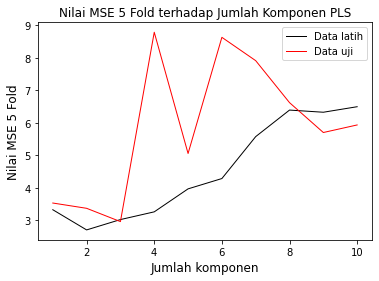

In [37]:
# Plotting the PRESS values for the training and validation sets:
plt.plot(range(1, 11), press_train[:10], label = 'Data latih', linewidth=1, color='black')
plt.plot(range(1, 11), press_test[:10], label = 'Data uji', linewidth=1, color='red')
plt.xlabel('Jumlah komponen', fontsize = 12)
plt.ylabel('Nilai MSE 5 Fold', fontsize = 12)
plt.title('Nilai MSE 5 Fold terhadap Jumlah Komponen PLS', fontsize = 12)
#plt.xticks(range(1, n_components + 1, 5))
plt.legend()
plt.show()

In [38]:
press_train_norm = (press_train - np.min(press_train)) / (np.max(press_train) - np.min(press_train))
press_test_norm = (press_test - np.min(press_test)) / (np.max(press_test) - np.min(press_test))
best_n_components = np.argmin(press_train_norm) + 1
print('The best number of components is:', best_n_components)

The best number of components is: 2


In [39]:
pls = PLSRegression(n_components = best_n_components)
pls.fit(X_train, y_train)
y_pred_train = pls.predict(X_train)
y_pred_val = pls.predict(X_val)
y_pred_test = pls.predict(X_test)

y_pred_train = np.clip(y_pred_train, 0, None)
y_pred_val = np.clip(y_pred_val, 0, None)
y_pred_test = np.clip(y_pred_test, 0, None)

In [40]:
# Evaluation metrics:
# RMSE:
rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse_val = np.sqrt(np.mean((y_pred_val - y_val)**2))
rmse_test = np.sqrt(np.mean((y_pred_test - y_test)**2))

# MAE:
mae_train = np.mean(np.abs(y_pred_train - y_train))
mae_val = np.mean(np.abs(y_pred_val - y_val))
mae_test = np.mean(np.abs(y_pred_test - y_test))

df = pd.DataFrame({'RMSE': [rmse_train, rmse_val, rmse_test], 'MAE': [mae_train, mae_val, mae_test]}, index = ['Train', 'Validation', 'Test'])
df.round(3)

,RMSE,MAE
Train,3.282,2.680
Validation,2.999,2.473
Test,3.292,2.706


In [41]:
# Print some results:
y_test = np.round(y_test, 4)
y_pred_test = np.round(y_pred_test, 4)

df = pd.DataFrame({'Real concentration A': y_test, 'Predicted concentration A': y_pred_test[:,0]})
# Multi level column names:
df.columns = pd.MultiIndex.from_product([['Data'], ['Real', 'Predicted']])
df.index += 1
df[:10]

Data          
      Real Predicted
1   5.1974    5.2995
2   6.4403    7.3193
3   0.0282    1.8640
4   0.1977    3.1503
5   1.9208    3.0031
6   4.9714    5.4264
7   4.8584    5.2334
8   0.3955    1.3689
9   2.9377    1.3459
10  4.8584    5.4730

In [42]:
# Concatenate predictions and actual values for comparison
y_pred = np.concatenate((y_pred_train, y_pred_val, y_pred_test), axis=0)
y = np.concatenate((y_train, y_val, y_test), axis=0)
labels_all = np.concatenate((labels_train, labels_val, labels_test), axis=0)

# Round the predictions and actual values
y_pred = np.round(y_pred, 4)
y = np.round(y, 4)

df_results = pd.DataFrame({'Label': labels_all, 'Prediction': y_pred[:, 0], 'Real': y})

print(df_results.head(20))

        Label  Prediction    Real
0      CPKO.W      4.3790  5.3104
1      CPO.MM      6.0302  5.1974
2     CPKO.MM      1.8886  2.8247
3    RBDPKO.W      1.4612  0.1130
4     RBDPO.W      0.7755  0.4802
5   RBDPKO.MM      1.6588  0.0282
6       CPO.W      5.3840  5.6494
7      CPKO.W      1.6417  5.1974
8    RBDPKO.W      1.1062  0.1977
9    RBDPKO.W      1.2380  0.0847
10      CPO.W      5.6442  6.3273
11   RBDPKO.W      1.2624  0.0565
12     CPO.MM      4.9808  6.1013
13    RBDPO.W      1.0145  0.0847
14     CPKO.W      1.7058  5.1974
15      CPO.K      5.2253  3.6156
16      CPO.W      5.7525  7.1182
17    CPKO.MM      2.2924  3.5026
18      CPO.C      6.0997  7.2312
19   RBDPKO.A      0.5809  0.1130


In [43]:
df_results

,Label,Prediction,Real
0,CPKO.W,4.3790,5.3104
1,CPO.MM,6.0302,5.1974
2,CPKO.MM,1.8886,2.8247
3,RBDPKO.W,1.4612,0.1130
4,RBDPO.W,0.7755,0.4802
...,...,...,...
89,CPKO.W,1.7435,2.5987
90,CPKO.MM,2.1863,3.8416
91,CPKO.W,3.7502,5.4234
92,CPO.W,7.8963,7.1182


In [44]:
# Extract the concentration column for rows with label 'a' from df_data
df_data_a_concentration = all_data[all_data['labels'] == 'RBDPKOWilmar']['concentration']
print("Concentration values for df_data with label RBDPKOWilmar:")
print(df_data_a_concentration)

# Extract rows with label 'a' from df_results
df_results_a = df_results[df_results['Label'] == 'RBDPKOWilmar']
print("\ndf_results with label RBDPKOWilmar:")
print(df_results_a)

Concentration values for df_data with label RBDPKOWilmar:
Series([], Name: concentration, dtype: float64)

df_results with label RBDPKOWilmar:
Empty DataFrame
Columns: [Label, Prediction, Real]
Index: []


In [45]:
# Extract unique values from the 'Label' column
unique_labels = df_results['Label'].unique().tolist()

# Print the list
print(unique_labels)

['CPKO.W', 'CPO.MM', 'CPKO.MM', 'RBDPKO.W', 'RBDPO.W', 'RBDPKO.MM', 'CPO.W', 'CPO.K', 'CPO.C', 'RBDPKO.A', 'RBDPO.MM', 'CPKO.A', 'RBDPO.A']


In [46]:
# Loop through each unique label and print the corresponding rows
for label in unique_labels:
    print(f"Label: {label}")
    print(df_results[df_results['Label'] == label])
    print()

Label: CPKO.W
     Label  Prediction    Real
0   CPKO.W      4.3790  5.3104
7   CPKO.W      1.6417  5.1974
14  CPKO.W      1.7058  5.1974
27  CPKO.W      1.8450  3.3896
28  CPKO.W      1.7547  5.4234
37  CPKO.W      1.6336  4.9714
43  CPKO.W      1.8109  3.8416
49  CPKO.W      1.5231  4.9714
50  CPKO.W      1.9262  2.9377
68  CPKO.W      1.4826  5.1127
83  CPKO.W      1.3459  2.9377
89  CPKO.W      1.7435  2.5987
91  CPKO.W      3.7502  5.4234

Label: CPO.MM
     Label  Prediction    Real
1   CPO.MM      6.0302  5.1974
12  CPO.MM      4.9808  6.1013
64  CPO.MM      5.3856  5.0844
73  CPO.MM      5.7197  5.0844
86  CPO.MM      4.8678  5.0844

Label: CPKO.MM
      Label  Prediction    Real
2   CPKO.MM      1.8886  2.8247
17  CPKO.MM      2.2924  3.5026
21  CPKO.MM      1.9891  3.8416
66  CPKO.MM      2.1548  3.6156
90  CPKO.MM      2.1863  3.8416

Label: RBDPKO.W
       Label  Prediction    Real
3   RBDPKO.W      1.4612  0.1130
8   RBDPKO.W      1.1062  0.1977
9   RBDPKO.W      1.2380  0

In [47]:
with pd.ExcelWriter('output.xlsx', engine='xlsxwriter') as writer:
    # Loop through each unique label and write to a separate sheet
    for label in unique_labels:
        df_results[df_results['Label'] == label].to_excel(writer, sheet_name=label, index=False)

print("Data saved to output.xlsx")

Data saved to output.xlsx


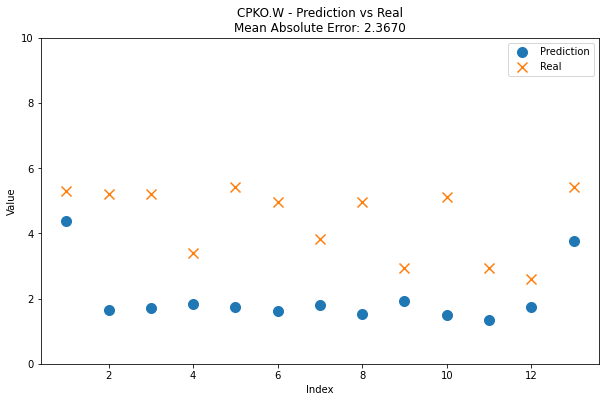

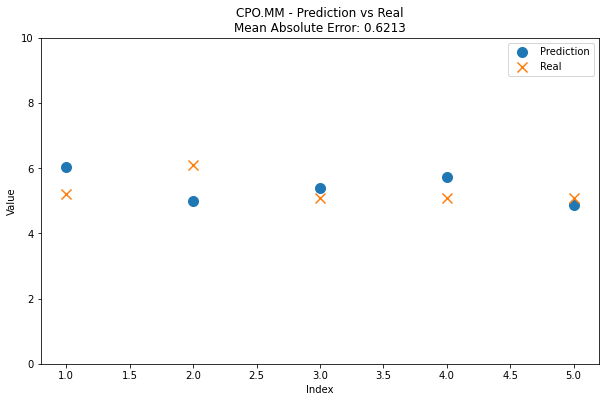

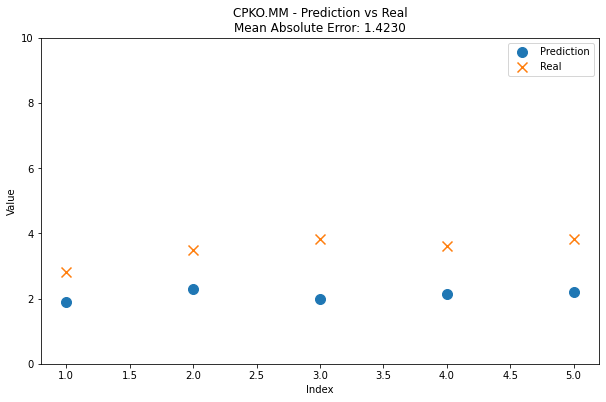

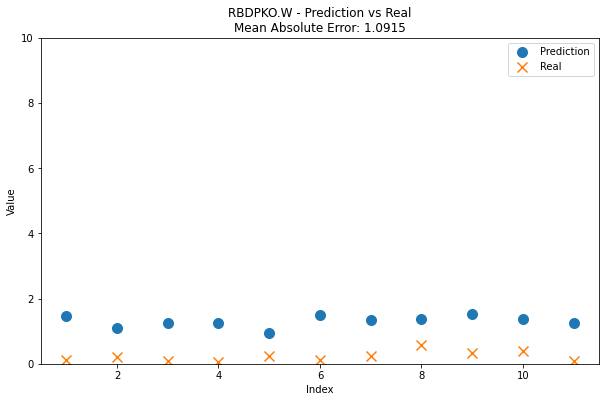

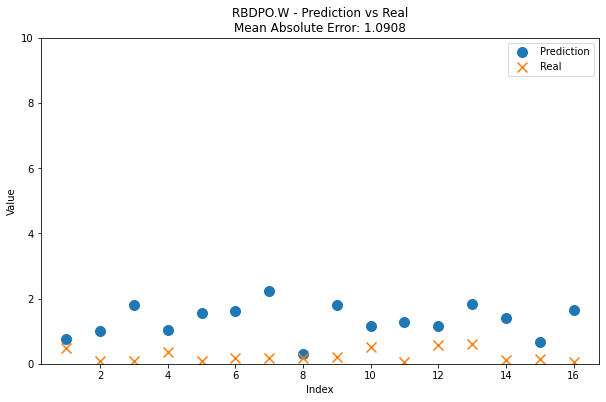

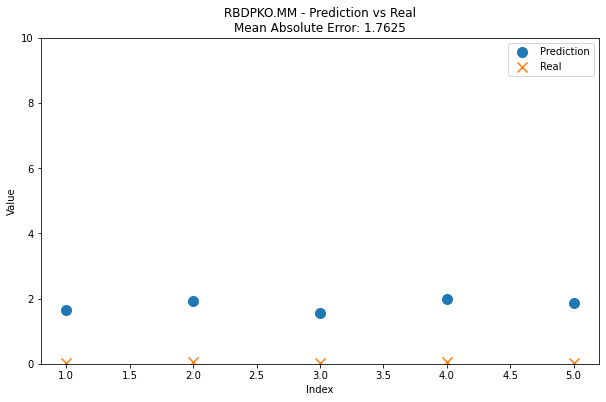

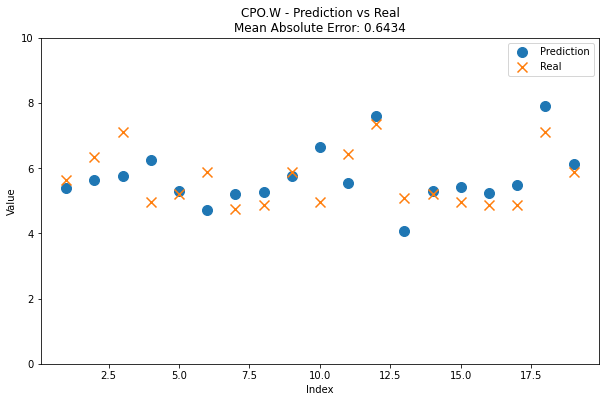

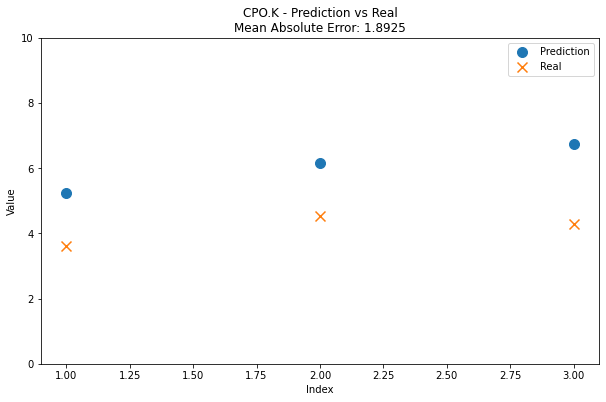

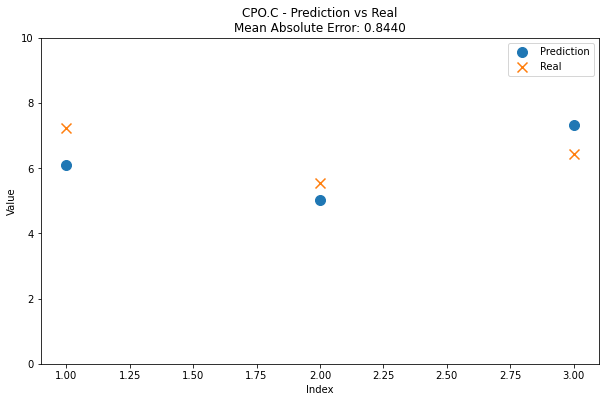

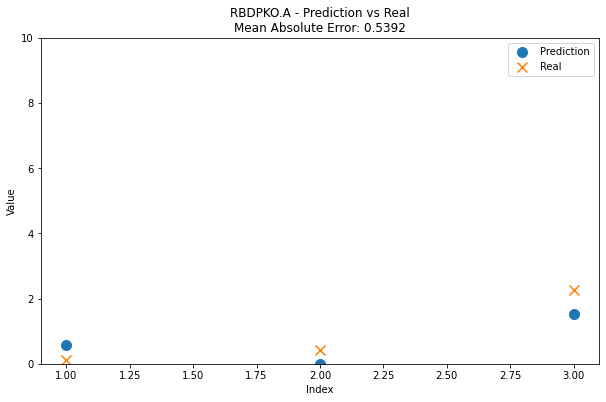

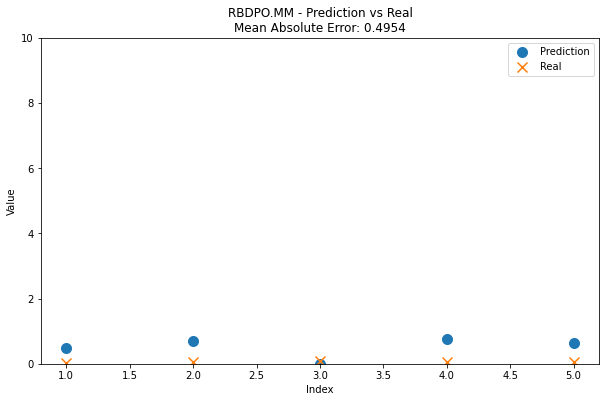

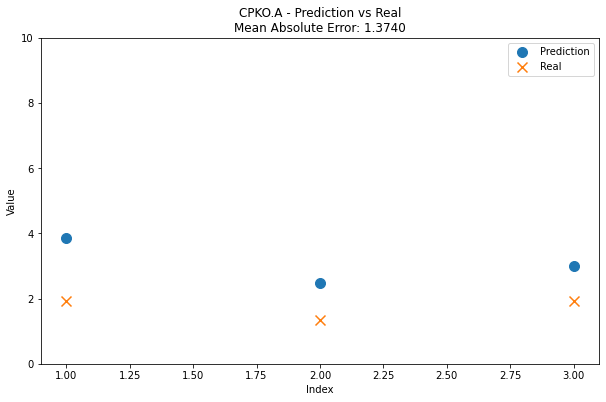

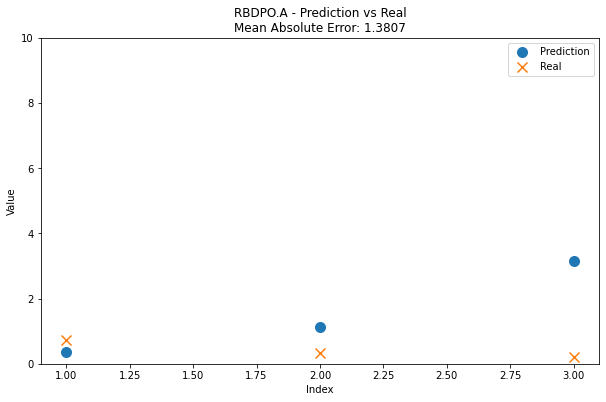

In [48]:
for label in unique_labels:
    subset_df = df_results[df_results['Label'] == label]
    
    # Calculate the error (Mean Absolute Error)
    mae = (subset_df['Prediction'] - subset_df['Real']).abs().mean()
    
    # Create a new index from 1 to the length of the subset
    new_index = range(1, len(subset_df) + 1)
    
    # Plot the data as scatter plot without lines
    plt.figure(figsize=(10, 6))
    plt.scatter(new_index, subset_df['Prediction'], label='Prediction', marker='o', s=100)
    plt.scatter(new_index, subset_df['Real'], label='Real', marker='x', s=100)
    plt.ylim(0, 10)
    # Add title and labels
    plt.title(f'{label} - Prediction vs Real\nMean Absolute Error: {mae:.4f}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    
    # Show the plot
    plt.show()

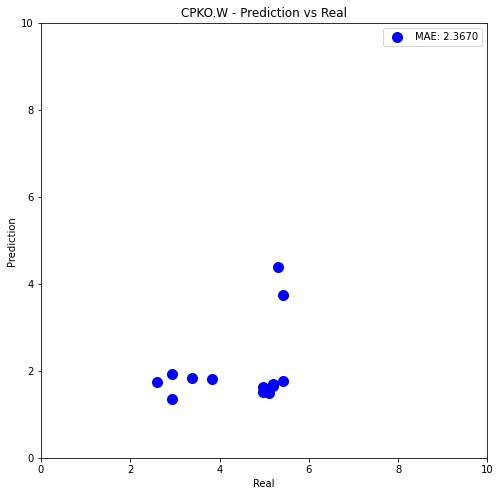

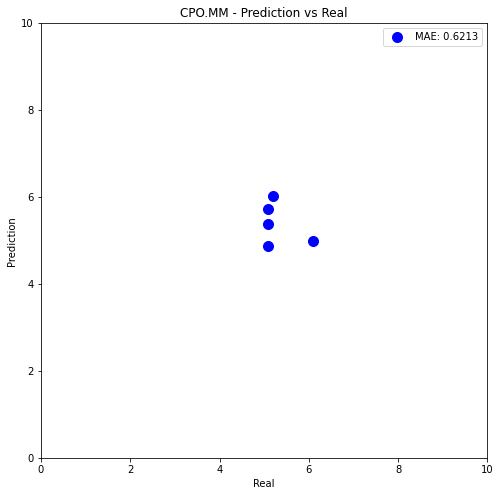

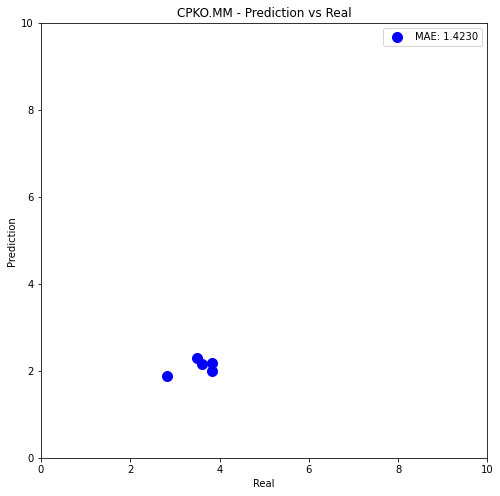

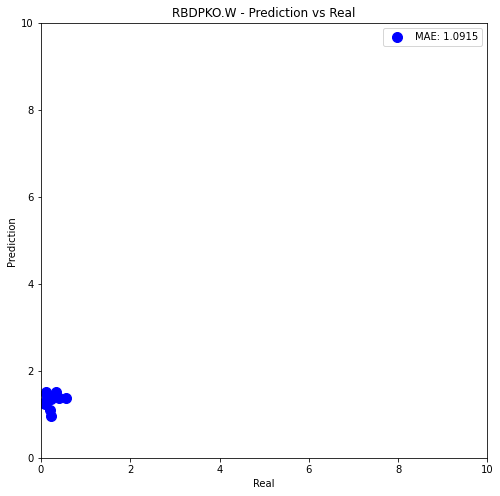

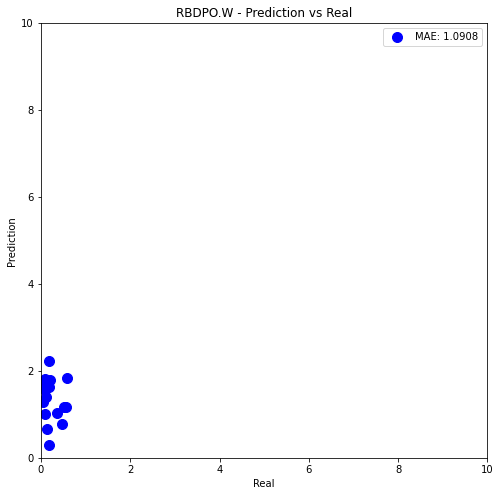

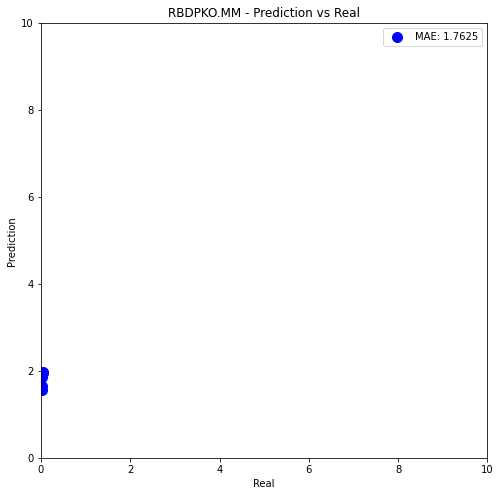

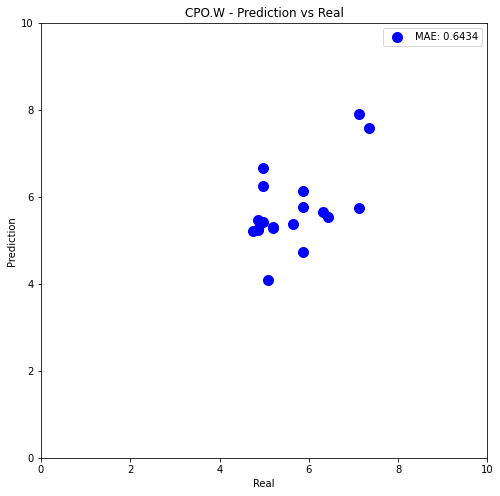

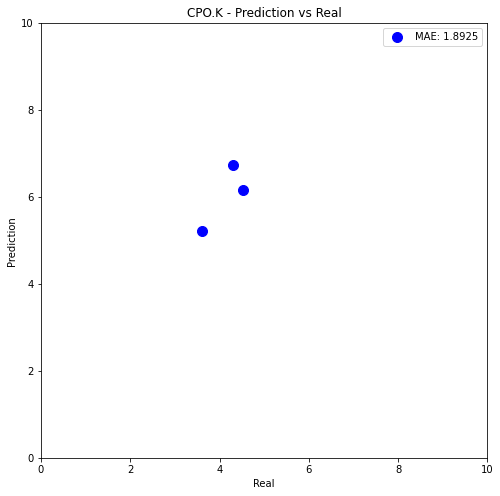

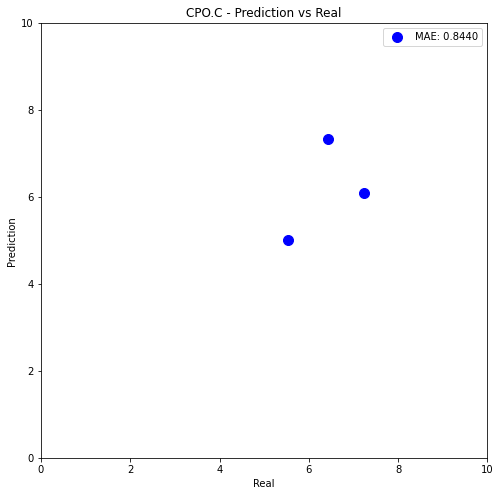

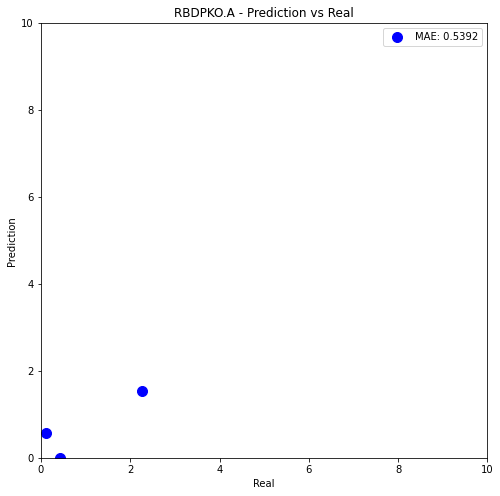

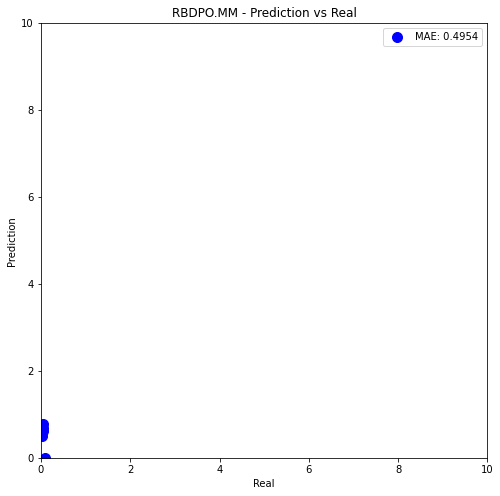

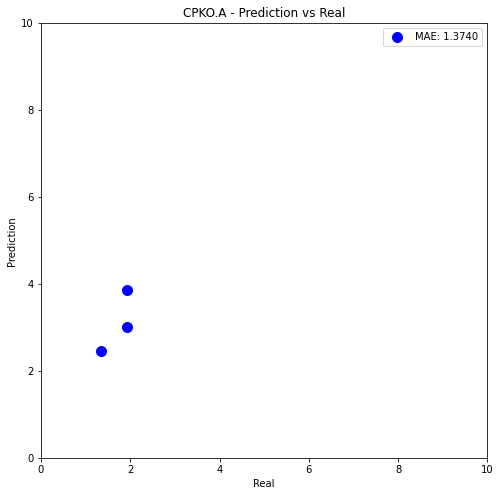

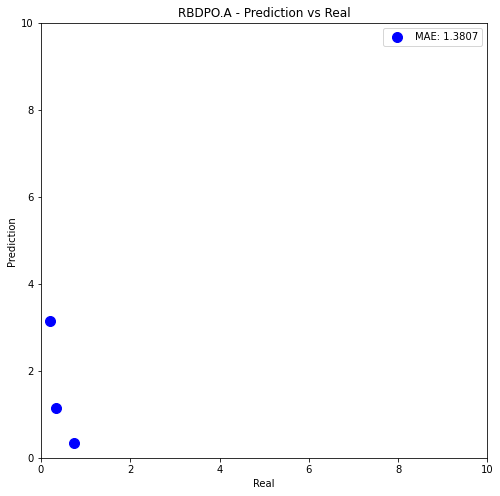

In [49]:
for label in unique_labels:
    subset_df = df_results[df_results['Label'] == label]
    
    # Calculate the error (Mean Absolute Error)
    mae = (subset_df['Prediction'] - subset_df['Real']).abs().mean()
    
    # Plot the data
    plt.figure(figsize=(8, 8))
    plt.scatter(subset_df['Real'], subset_df['Prediction'], label=f'MAE: {mae:.4f}', color='blue', s=100)
    
    # Plot y=x line for reference
    #plt.plot([0, 10], [0, 10], linestyle='--', color='red', label='y=x')
    
    # Set the limits for x and y axes
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    
    # Add title and labels
    plt.title(f'{label} - Prediction vs Real')
    plt.xlabel('Real')
    plt.ylabel('Prediction')
    plt.legend()
    
    # Show the plot
    plt.show()

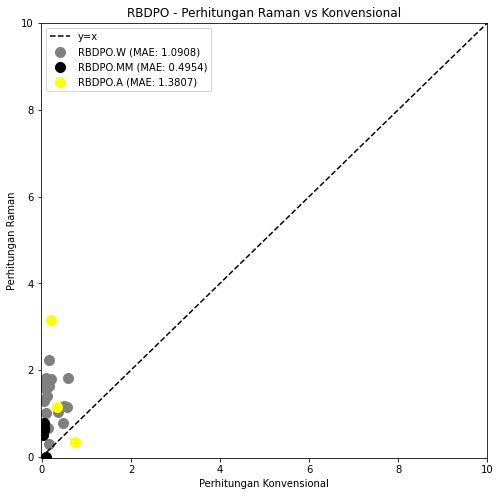

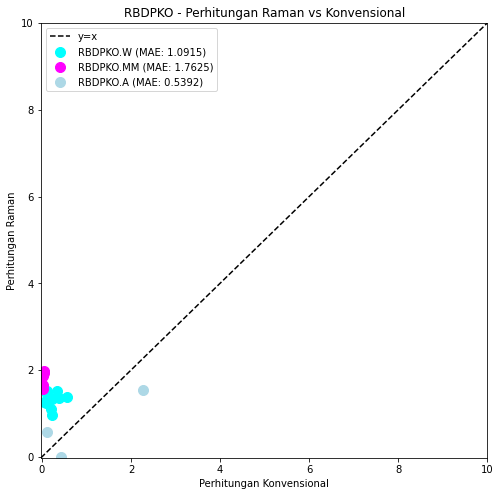

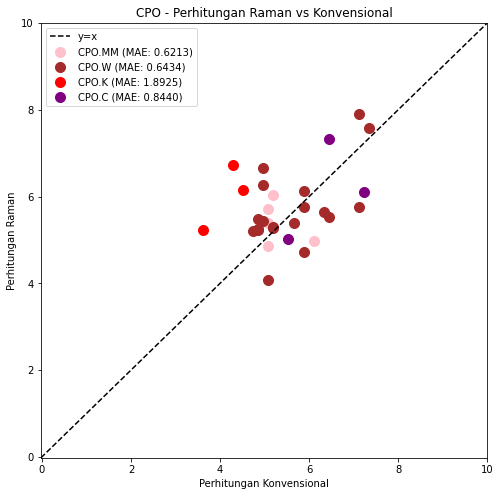

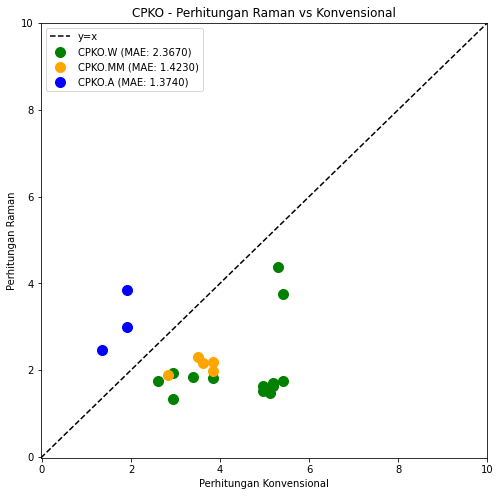

In [50]:
# Categories to filter
categories = ['RBDPO', 'RBDPKO', 'CPO', 'CPKO']

# Colors for different samples
colors = {
    'CPKO.A': 'blue',
    'CPKO.W': 'green',
    'CPKO.MM': 'orange',
    'CPO.C': 'purple',
    'CPO.K': 'red',
    'CPO.W': 'brown',
    'CPO.MM': 'pink',
    'RBDPKO.A': 'lightblue',
    'RBDPKO.W': 'cyan',
    'RBDPKO.MM': 'magenta',
    'RBDPO.A': 'yellow',
    'RBDPO.W': 'grey',
    'RBDPO.MM': 'black'
}
for category in categories:
    # Filter data for each category
    category_data = df_results[df_results['Label'].str.contains(category)]
    
    plt.figure(figsize=(8, 8))
    
    for sample in category_data['Label'].unique():
        sample_data = category_data[category_data['Label'] == sample]
        
        # Calculate the error (Mean Absolute Error)
        mae = (sample_data['Prediction'] - sample_data['Real']).abs().mean()
        
        # Plot the data
        plt.scatter(sample_data['Real'], sample_data['Prediction'], label=f'{sample} (MAE: {mae:.4f})',
                    color=colors[sample], s=100)
    
    # Plot y=x line for reference
    plt.plot([-0.02, 10], [-0.02, 10], linestyle='--', color='black', label='y=x')
    
    # Set the limits for x and y axes
    plt.xlim(-0.02, 10)
    plt.ylim(-0.02, 10)
    
    # Add title and labels
    plt.title(f'{category} - Perhitungan Raman vs Konvensional')
    plt.xlabel('Perhitungan Konvensional')
    plt.ylabel('Perhitungan Raman')
    plt.legend()
    
    # Show the plot
    plt.show()